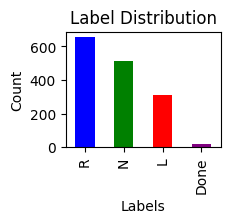

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('labeled-data.csv')

# Count the occurrences of each label
label_counts = df['label'].value_counts()

# Plot a bar chart
plt.figure(figsize=(2, 1.5))
label_counts.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

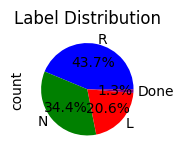

In [14]:
# Plot a pie chart
plt.figure(figsize=(2, 1.5))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple'])
plt.title('Label Distribution')
plt.show()

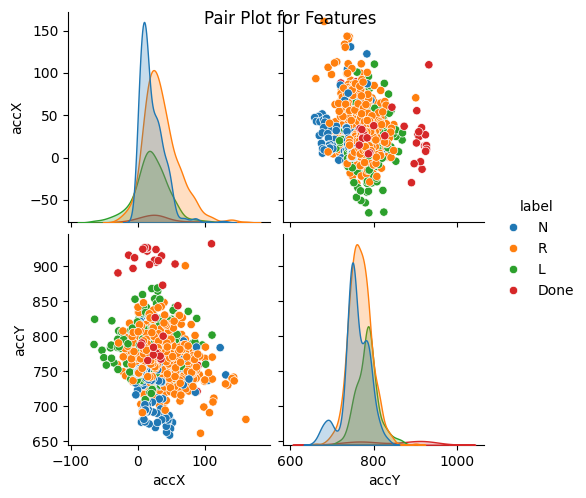

In [15]:
import seaborn as sns

# Assuming you have features in columns 2 to end
features = df.iloc[:, 2:]

# Specify the pair of features you want to focus on
f3 = 'accX'
f4 = 'accY'

# Combine features with labels
#df_combined = pd.concat([features, df['label']], axis=1)
df_combined = pd.concat([df[[f3, f4]], df['label']], axis=1)



# Plot a pair plot
sns.pairplot(df_combined, hue='label', diag_kind='kde')
plt.suptitle('Pair Plot for Features')
plt.show()

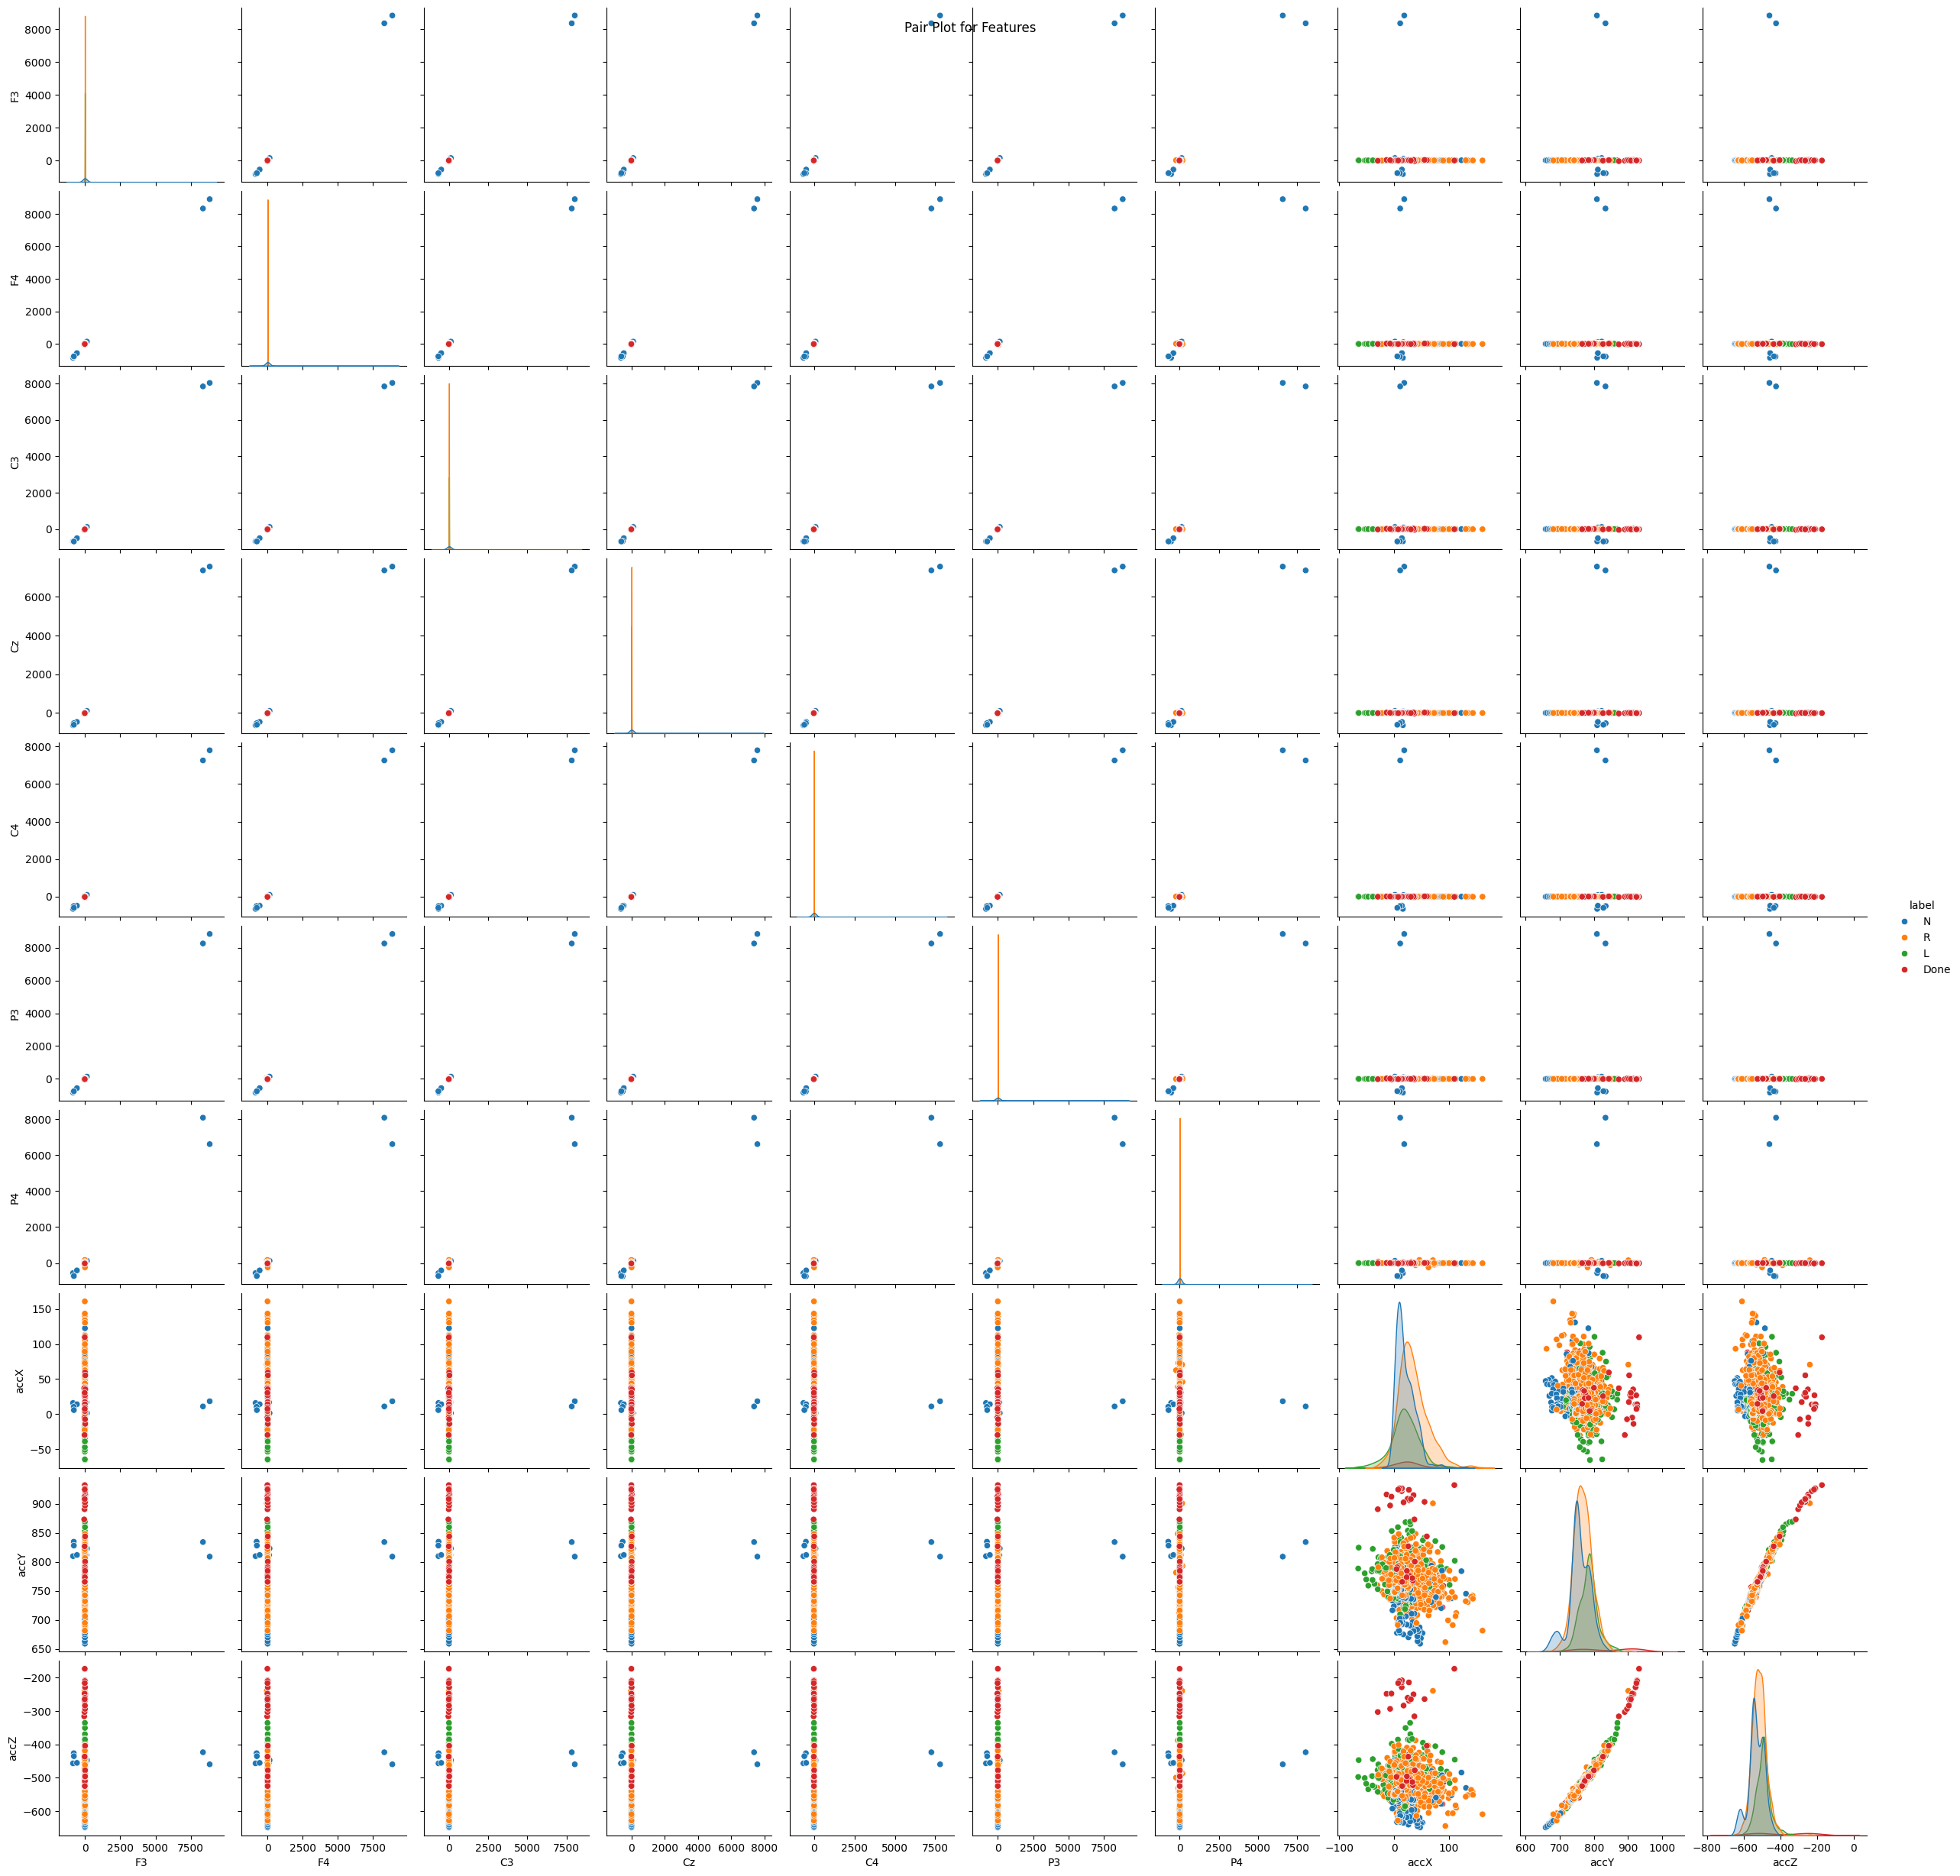

In [16]:
features = df.iloc[:, 2:]
# Combine features with labels
df_combined = pd.concat([features, df['label']], axis=1)

# Plot a pair plot
sns.pairplot(df_combined, hue='label', diag_kind='kde')
plt.suptitle('Pair Plot for Features')
plt.show()

ValueError: num must be an integer with 1 <= num <= 4, not 5

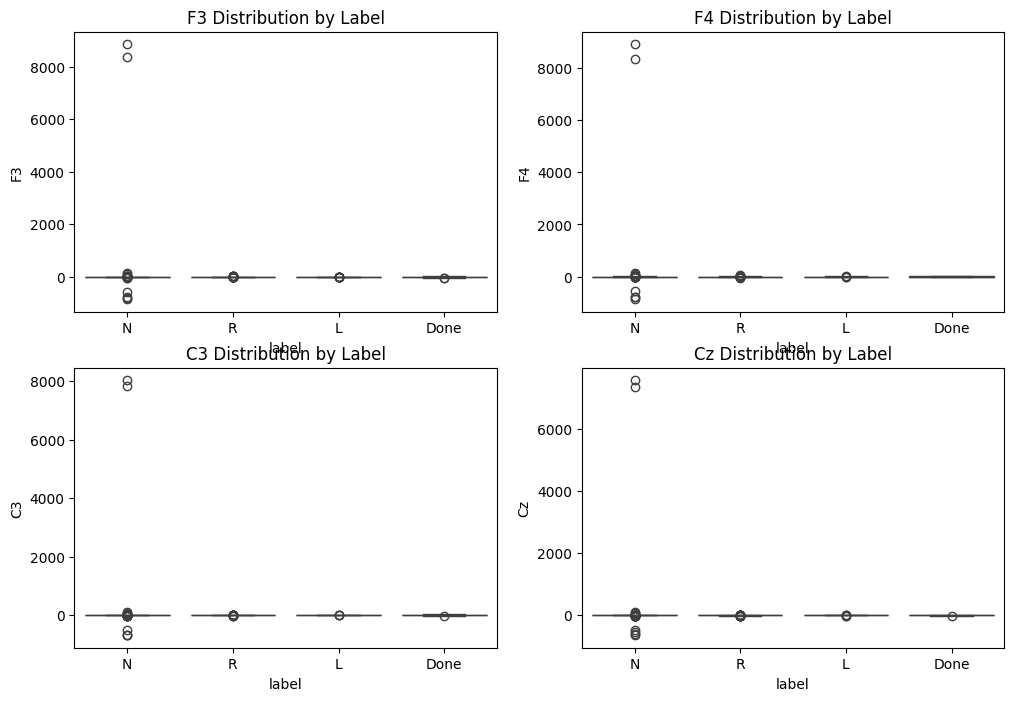

In [17]:
# Plot box plots for each feature by label
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} Distribution by Label')
plt.tight_layout()
plt.show()